# Draft Project



## Importing Libraries

In [33]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

## Importing Data

In [5]:
#Import covid dataset from CSV File

covid_data = pd.read_csv('/Users/ZacharyHarris/Downloads/owid-covid-data.csv')

# Printing Data and Examining

In [29]:
#Print out a couple of rows and all columns

covid_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
154678,ZWE,Africa,Zimbabwe,2022-01-10,223000.0,1082.0,987.571,5180.0,32.0,19.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154679,ZWE,Africa,Zimbabwe,2022-01-11,223000.0,0.0,760.286,5180.0,0.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154680,ZWE,Africa,Zimbabwe,2022-01-12,224433.0,1433.0,768.000,5215.0,35.0,17.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154681,ZWE,Africa,Zimbabwe,2022-01-13,225084.0,651.0,700.857,5222.0,7.0,16.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154682,ZWE,Africa,Zimbabwe,2022-01-14,225637.0,553.0,622.143,5238.0,16.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Determining Missing Values

In [8]:
#Info on entire dataset

covid_data.info()

#A majority of the attributes seem to be float64 or numerical. To be exact, 
#there are 62 numerical variables and 5 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154683 entries, 0 to 154682
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154683 non-null  object 
 1   continent                                   145377 non-null  object 
 2   location                                    154683 non-null  object 
 3   date                                        154683 non-null  object 
 4   total_cases                                 151890 non-null  float64
 5   new_cases                                   151844 non-null  float64
 6   new_cases_smoothed                          150693 non-null  float64
 7   total_deaths                                134569 non-null  float64
 8   new_deaths                                  134742 non-null  float64
 9   new_deaths_smoothed                         134610 non-null  float64
 

In [18]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.518900e+05,1.518440e+05,1.506930e+05,1.345690e+05,134742.000000,134610.000000,151182.000000,151136.000000,149990.000000,133874.000000,...,98767.000000,97347.000000,63792.000000,115181.000000,144372.000000,126838.000000,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,2.173590e+06,8.959118e+03,8.752216e+03,5.337774e+04,170.277657,169.670269,23945.515487,116.247465,111.998075,463.245222,...,10.624167,32.764852,50.808965,3.028408,73.583597,0.725825,3.479999e+04,9.011418,16.175762,857.853331
std,1.288762e+07,5.842173e+04,5.363848e+04,2.805078e+05,829.894430,810.210018,39129.368153,442.093477,300.107864,729.438132,...,10.554026,13.515827,31.812476,2.451979,7.496422,0.149983,9.949991e+04,16.669961,31.091730,1283.239325
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.195940e+04,-28.450000,-95.920000,-1745.051271
25%,1.613000e+03,1.000000e+00,6.000000e+00,6.900000e+01,0.000000,0.143000,523.100750,0.025000,1.462000,16.069000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-9.752500e+01,-0.870000,-0.520000,-37.856745
50%,2.133000e+04,7.100000e+01,9.471400e+01,6.890000e+02,2.000000,2.286000,4074.265500,10.218500,16.246000,107.847000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2.580050e+03,5.505000,7.205000,401.789828
75%,2.602920e+05,9.420000e+02,9.928570e+02,6.557000e+03,19.000000,20.143000,31427.349250,88.553000,101.416500,630.972000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.147995e+04,13.887500,22.687500,1456.137413
max,3.235679e+08,3.701643e+06,2.879155e+06,5.529524e+06,18062.000000,14704.857000,386379.502000,51427.491000,9241.954000,6092.883000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.043824e+06,115.000000,374.340000,7912.067517


# Eliminate Rows

In [30]:

#Eliminate Rows

covid_data['continent'].replace('', np.nan, inplace=True)
covid_data.dropna(subset=['continent'], inplace=True)
print(covid_data.info())

#A lot of the rows have items in location such as low income, low - mid income. I found those to be the 
# ones with no continent. Those were eliminated


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145377 entries, 0 to 154682
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    145377 non-null  object 
 1   continent                                   145377 non-null  object 
 2   location                                    145377 non-null  object 
 3   date                                        145377 non-null  object 
 4   total_cases                                 142591 non-null  float64
 5   new_cases                                   142538 non-null  float64
 6   new_cases_smoothed                          141464 non-null  float64
 7   total_deaths                                125476 non-null  float64
 8   new_deaths                                  125449 non-null  float64
 9   new_deaths_smoothed                         125389 non-null  float64
 

# Eliminate Columns

List of Dropped Columns

* iso_code
* aged_65_older
* aged_70_older
* male_smokers
* female_smokers
* excess_mortality_cumulative_absolute
* excess_mortality_cumulative
* excess_mortality
* excess_mortality_cumulative_per_million
* total_vaccinations_per_hundred
* people_vaccinated_per_hundred               
* people_fully_vaccinated_per_hundred 
 9   total_cases_per_million                     142591 non-null  float64
 10  new_cases_per_million                       142538 non-null  float64
 11  new_cases_smoothed_per_million              141464 non-null  float64
 12  total_deaths_per_million                    125476 non-null  float64
 13  new_deaths_per_million                      125449 non-null  float64
 14  new_deaths_smoothed_per_million 
 26  total_tests_per_thousand                    62746 non-null   float64
 27  new_tests_per_thousand                      61107 non-null   float64
 28  new_tests_smoothed                          73744 non-null   float64
 29  new_tests_smoothed_per_thousand 

In [45]:
#Eliminate Columns


#covid_data.drop('iso_code', axis = 1, inplace=True)
#covid_data.drop('aged_65_older', axis = 1, inplace=True)
#covid_data.drop('aged_70_older', axis = 1, inplace=True)
#covid_data.drop('male_smokers', axis = 1, inplace=True)
#covid_data.drop('female_smokers', axis = 1, inplace=True)
#covid_data.drop('excess_mortality_cumulative_absolute', axis = 1, inplace=True)
#covid_data.drop('excess_mortality_cumulative', axis = 1, inplace=True)
#covid_data.drop('excess_mortality', axis = 1, inplace=True)
#covid_data.drop('excess_mortality_cumulative_per_million', axis = 1, inplace=True)
#covid_data.drop('total_vaccinations_per_hundred', axis = 1, inplace=True)
#covid_data.drop('people_vaccinated_per_hundred', axis = 1, inplace=True)
#covid_data.drop('people_fully_vaccinated_per_hundred', axis = 1, inplace=True)
#covid_data.drop('total_cases_per_million', axis = 1, inplace=True)
#covid_data.drop('new_cases_per_million', axis = 1, inplace=True)
#covid_data.drop('new_cases_smoothed_per_million', axis = 1, inplace=True)
#covid_data.drop('total_deaths_per_million', axis = 1, inplace=True)
#covid_data.drop('new_deaths_per_million', axis = 1, inplace=True)
#covid_data.drop('new_deaths_smoothed_per_million', axis = 1, inplace=True)
#covid_data.drop('total_tests_per_thousand', axis = 1, inplace=True)
#covid_data.drop('new_tests_per_thousand', axis = 1, inplace=True)
#covid_data.drop('new_tests_smoothed', axis = 1, inplace=True)
#covid_data.drop('new_tests_smoothed_per_thousand', axis = 1, inplace=True)
#covid_data = covid_data.drop(covid_data.columns[[11, 13, 15, 17,29, 30, 32, 42, 44]], axis=1)
covid_data = covid_data.drop(covid_data.columns[[5, 8, 24, 25]], axis=1)               
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145377 entries, 0 to 154682
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                145377 non-null  object 
 1   location                 145377 non-null  object 
 2   date                     145377 non-null  object 
 3   total_cases              142591 non-null  float64
 4   new_cases                142538 non-null  float64
 5   total_deaths             125476 non-null  float64
 6   new_deaths               125449 non-null  float64
 7   reproduction_rate        115730 non-null  float64
 8   icu_patients             20397 non-null   float64
 9   hosp_patients            21564 non-null   float64
 10  weekly_icu_admissions    4294 non-null    float64
 11  weekly_hosp_admissions   8694 non-null    float64
 12  new_tests                61107 non-null   float64
 13  total_tests              62746 non-null   float64
 14  posi

# Final Correlation Matrix

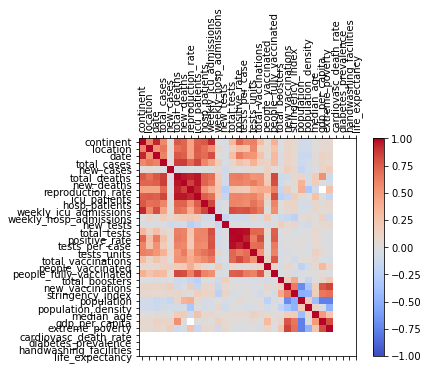

In [46]:
corr = covid_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(covid_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(covid_data.columns)
ax.set_yticklabels(covid_data.columns)
plt.show()

In [ ]:
#Replacements
covid_data.replace(to_replace="",value = )

#Numberical values to floats
continuous_features = ['']

#Identify continuous_features
ordinal_features = ['']

#Identify ordinal Features
categ_features = ['']

#Categorical variables
covid_data[continuous_features] = covid_data[continuous_features].astype(np.float64)
covid_data[ordinal_features] = covid_data[ordinal_features].astype(np.float64)